In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('weekr5.2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'weekr5.2.csv'

In [ ]:
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Preprocess the data
def preprocess_data(data):
    X = data.fillna(data.mean())  # Handle missing values
    scaler = StandardScaler()     # Standardize the data
    X_scaled = scaler.fit_transform(X)
    return X_scaled

X_scaled = preprocess_data(data.iloc[:, :-1])


In [ ]:
# Display the preprocessed dataset
preprocessed_data = pd.DataFrame(X_scaled, columns=data.columns[:-1])  # Convert to DataFrame for display
print("Preprocessed Data (first 10 rows):")
print(preprocessed_data.head(10))  # Display the first 10 rows of the preprocessed dataset


Preprocessed Data (first 10 rows):
   starttime   endtime      user      week   project      role    b_unit  \
0  -1.481774 -1.481774 -1.710322 -1.481774  0.414220  1.215239  1.018918   
1  -1.481774 -1.481774 -1.708562 -1.481774 -3.149020  0.666737  1.018918   
2  -1.481774 -1.481774 -1.706803 -1.481774  0.414220 -1.527272 -0.973361   
3  -1.481774 -1.481774 -1.705043 -1.481774  0.414220  1.215239  1.018918   
4  -1.481774 -1.481774 -1.703284 -1.481774 -2.008783  0.039877 -0.973361   
5  -1.481774 -1.481774 -1.701525 -1.481774  0.414220  0.274950  1.018918   
6  -1.481774 -1.481774 -1.699765 -1.481774  0.414220 -0.038480  1.018918   
7  -1.481774 -1.481774 -1.698006 -1.481774  0.414220 -0.038480 -0.973361   
8  -1.481774 -1.481774 -1.696246 -1.481774  0.414220  0.823452 -0.973361   
9  -1.481774 -1.481774 -1.694487 -1.481774  0.414220 -0.743697 -0.973361   

     f_unit      dept      team  ...  weekendhttp_leakf_n-pc3  \
0  1.232814  0.035738 -0.246829  ...                      0.0  

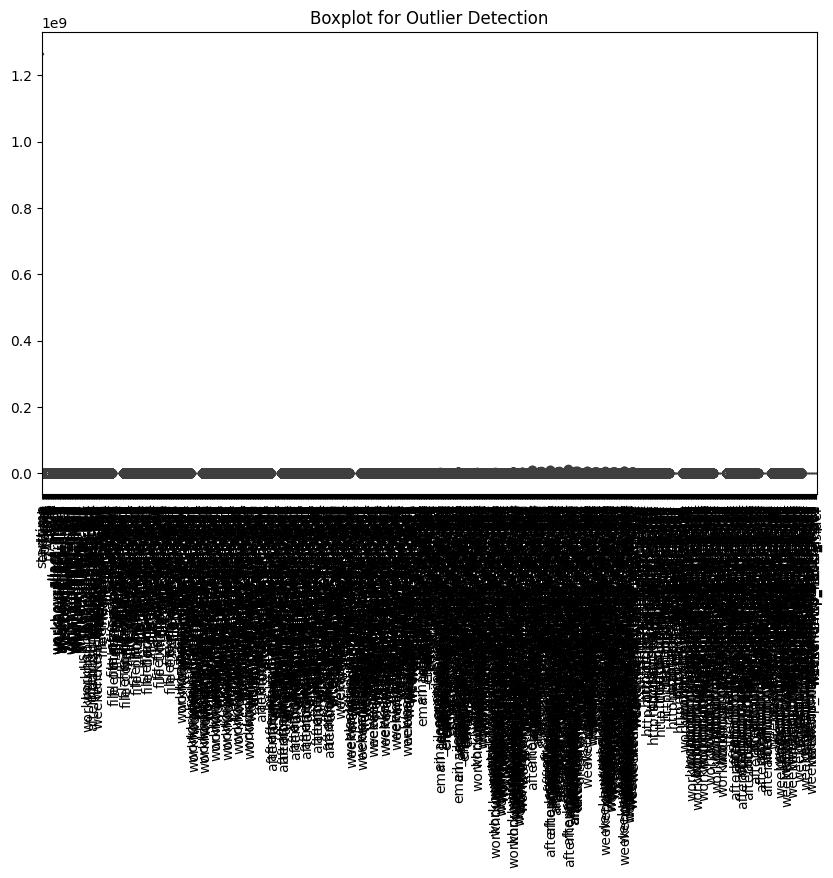

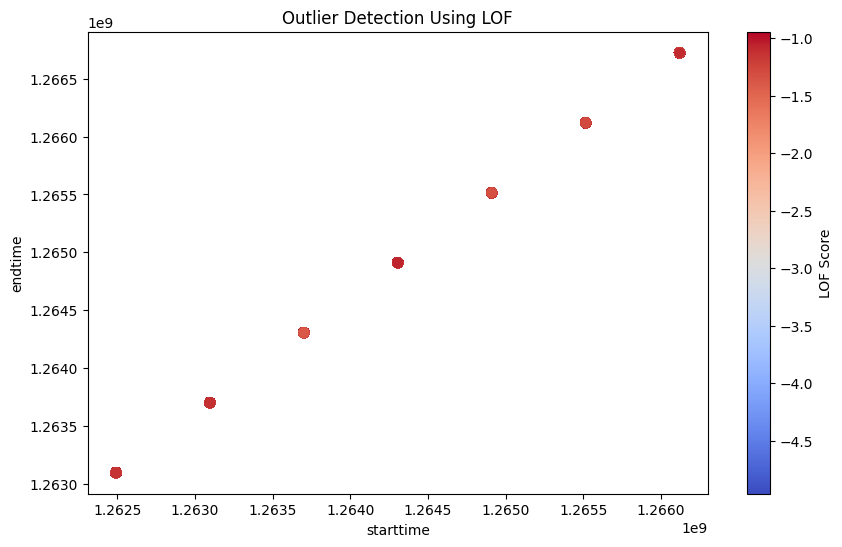

In [ ]:
numeric_cols = data.select_dtypes(include=np.number)
# Drop rows with NaN values
numeric_cols = numeric_cols.dropna()

# OR Impute missing values with the mean
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Boxplot for Outlier Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

# LOF for Outlier Detection
lof = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof.fit_predict(numeric_cols)

# Scatterplot with LOF Scores
plt.figure(figsize=(10, 6))
plt.scatter(numeric_cols.iloc[:, 0], numeric_cols.iloc[:, 1], c=lof.negative_outlier_factor_, cmap='coolwarm', s=50)
plt.colorbar(label='LOF Score')
plt.xlabel(numeric_cols.columns[0])
plt.ylabel(numeric_cols.columns[1])
plt.title('Outlier Detection Using LOF')
plt.show()

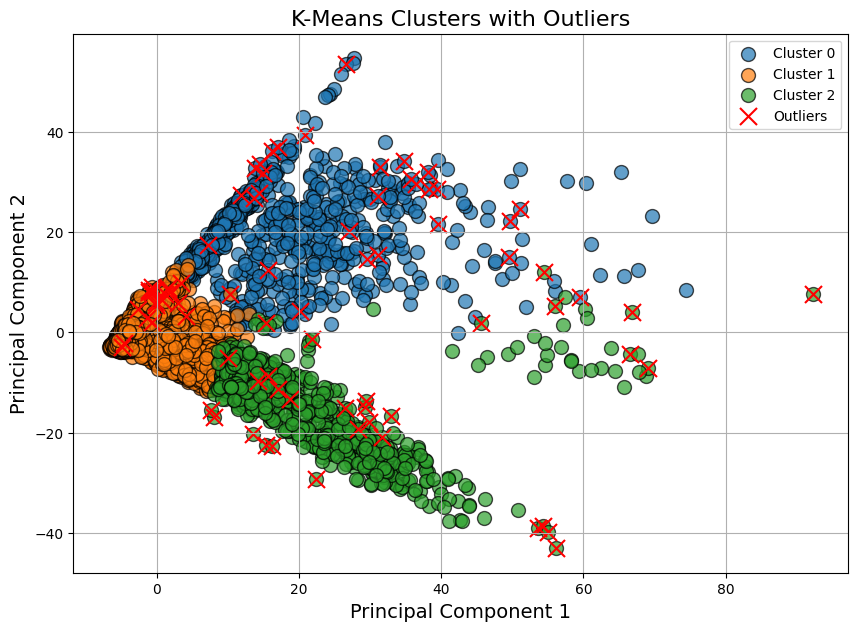

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
# Replace 'your_dataset.csv' with the actual file path
# data = pd.read_csv('your_dataset.csv')

# Select numeric columns and scale the data
numeric_cols = data.select_dtypes(include=np.number).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Step 1: Detect outliers using LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.006)  # Adjust contamination as needed
outlier_labels = lof.fit_predict(X_scaled)
is_outlier = outlier_labels == -1  # Identify points labeled as outliers (-1)

# Step 2: Train K-Means on the entire dataset
n_clusters = 3  # Adjust based on the elbow method or domain knowledge
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)  # Cluster assignments

# Step 3: Reduce data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Step 4: Plot K-Means clusters with outliers highlighted
def plot_kmeans_with_outliers(X, y_pred, is_outlier, n_clusters, title='K-Means Clusters with Outliers'):
    plt.figure(figsize=(10, 7))

    # Plot K-Means clusters
    for i in range(n_clusters):
        cluster_points = X[y_pred == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    label=f'Cluster {i}', alpha=0.7, s=100, edgecolor='k')

    # Plot outliers
    outlier_points = X[is_outlier]
    if len(outlier_points) > 0:  # Only plot if there are outliers
        plt.scatter(outlier_points[:, 0], outlier_points[:, 1],
                    c='red', label='Outliers', marker='x', s=150)

    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the results
plot_kmeans_with_outliers(X_reduced, y_pred, is_outlier, n_clusters)


In [ ]:
outlier_points = numeric_cols[is_outlier]

# Print the outlier points with their indices
print("Outlier points:\n")
print(outlier_points)

In [ ]:
len(outlier_points)

82

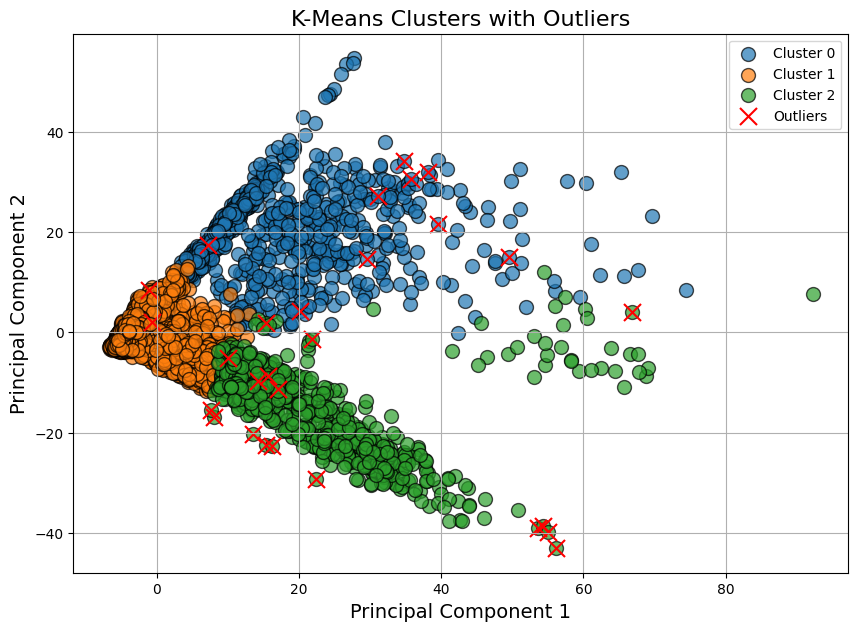

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
# Replace 'your_dataset.csv' with the actual file path
# data = pd.read_csv('your_dataset.csv')

# Select numeric columns and scale the data
numeric_cols = data.select_dtypes(include=np.number).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Step 1: Detect outliers using LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.002)  # Adjust contamination as needed
outlier_labels = lof.fit_predict(X_scaled)
is_outlier = outlier_labels == -1  # Identify points labeled as outliers (-1)

# Step 2: Train K-Means on the entire dataset
n_clusters = 3  # Adjust based on the elbow method or domain knowledge
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)  # Cluster assignments

# Step 3: Reduce data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Step 4: Plot K-Means clusters with outliers highlighted
def plot_kmeans_with_outliers(X, y_pred, is_outlier, n_clusters, title='K-Means Clusters with Outliers'):
    plt.figure(figsize=(10, 7))

    # Plot K-Means clusters
    for i in range(n_clusters):
        cluster_points = X[y_pred == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    label=f'Cluster {i}', alpha=0.7, s=100, edgecolor='k')

    # Plot outliers
    outlier_points = X[is_outlier]
    if len(outlier_points) > 0:  # Only plot if there are outliers
        plt.scatter(outlier_points[:, 0], outlier_points[:, 1],
                    c='red', label='Outliers', marker='x', s=150)

    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the results
plot_kmeans_with_outliers(X_reduced, y_pred, is_outlier, n_clusters)


In [ ]:
outlier_points = numeric_cols[is_outlier]

# Print the outlier points with their indices
print("Outlier points:\n")
print(outlier_points)

Outlier points:

        starttime     endtime  user  week  project  role  b_unit  f_unit  \
717    1262491200  1263096000   717     1       56    28       1       2   
1205   1262491200  1263096000  1205     1       56    22       0       1   
1946   1262491200  1263096000  1946     1       56    28       0       2   
2148   1263096000  1263700800   148     2       56    32       0       4   
2413   1263096000  1263700800   413     2       11    46       0       0   
2964   1263096000  1263700800   964     2       56     6       1       1   
3072   1263096000  1263700800  1072     2       43     7       0       1   
3946   1263096000  1263700800  1946     2       56    28       0       2   
4101   1263700800  1264305600   101     3        5    16       0       0   
4384   1263700800  1264305600   384     3       56    16       1       0   
5946   1263700800  1264305600  1946     3       56    28       0       2   
6895   1264305600  1264910400   895     4       44    16       1       

In [ ]:
len(outlier_points)

28

**METRIC**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define contamination values to test
contamination_values = [0.02, 0.04, 0.06, 0.08, 0.10]

# Placeholder for results
results = []

for contamination in contamination_values:
    # Step 1: Detect outliers using LOF with varying contamination
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    outlier_labels = lof.fit_predict(X_scaled)
    predicted_outliers = (outlier_labels == -1).astype(int)  # Predicted outliers (1 for outliers, 0 for normal)

    # Step 2: Generate ground truth (use real labels if available)
    # Example: If ground truth is unknown, simulate it
    y_true = np.zeros(len(X_scaled))  # All points are normal initially
    # Assume some points are true outliers for demonstration
    y_true[:int(len(X_scaled) * contamination)] = 1  # Simulate contamination

    # Step 3: Calculate metrics
    accuracy = accuracy_score(y_true, predicted_outliers)
    detection_rate = recall_score(y_true, predicted_outliers)
    f1 = f1_score(y_true, predicted_outliers)

    # Log results
    results.append({
        "Contamination": contamination,
        "Accuracy": accuracy,
        "Detection Rate": detection_rate,
        "F1-Score": f1
    })

# Display results as a table
results_df = pd.DataFrame(results)
print(results_df)


   Contamination  Accuracy  Detection Rate  F1-Score
0           0.02  0.960554        0.014815  0.014787
1           0.04  0.922365        0.029630  0.029602
2           0.06  0.884917        0.040741  0.040716
3           0.08  0.848801        0.054630  0.054604
4           0.10  0.816237        0.081421  0.081391


In [ ]:
#delay time
